<a href="https://colab.research.google.com/github/laners01/2-2-dataprogramming/blob/main/dap_w13_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

df_titan_org = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
heart_list = [
    pd.read_csv(f"https://raw.githubusercontent.com/6n23rp/ZGFwMjNtaWRkYXRh/main/dzEy/aGVhcnQyMDIy_{i}.csv", index_col = 0)
    for i in range(5)
]
df_heart_org = pd.concat(heart_list)

## **1. Sigmoid Function**

Sigmoid Function은 실수를 인자로 받아 이를 $[0, 1]$ 범위 내의 값으로 바꾸는 함수입니다. 종류가 여러 가지가 있으며, 그 중 우리가 다룰 로지스틱 함수(그냥 시그모이드 함수로 부르겠습니다)는 다음과 같이 정의됩니다: <br>
$\sigma(x)=\frac{1}{1+e^{-x}}$ ($e$는 자연로그의 밑) <br>

이걸 어디다 쓰는지는 **3.**에서 설명합니다.

[-6.0139126  -3.01503858 -2.12134615 -1.60986344  4.4776399 ]


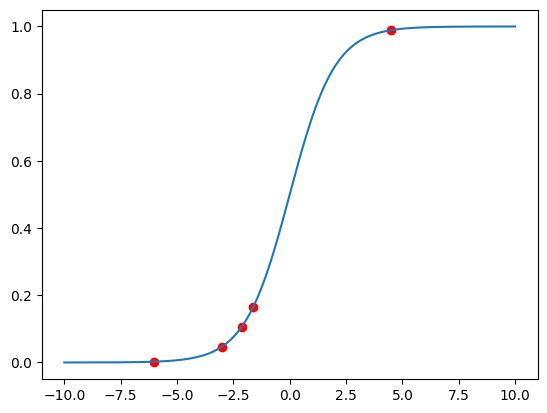

In [2]:
# 1. Sigmoid Function을 sigmoid라는 이름의 함수로 정의하고, 이를 그래프로 나타내봅니다.
# 지수함수(e^{-x})는 np.exp()를 이용합니다.

######>

sigmoid = (lambda x:1/(1+np.exp(-x)))

######<

x = np.arange(-10, 10, 1e-3)
y = sigmoid(x)
plt.plot(x, y)

some_random_xs = np.random.uniform(-10, 10, 5)

print(np.sort(some_random_xs))
plt.scatter(some_random_xs, sigmoid(some_random_xs), color = 'red')

plt.show()

## **2. Classification, Classification Metrics**

Accuracy, Precision, Recall, F1 Score, ROC Curve, AUC에 대해서 다룹니다. 아래 공식과 주석을 참조하세요.

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ <br>
$Precision = \frac{TP}{TP+FP}$ <br>
$Recall = \frac{TP}{TP+FN}$ <br>
$F1 Score = 2\times\frac{Precision\times Recall}{Precision+Recall}$



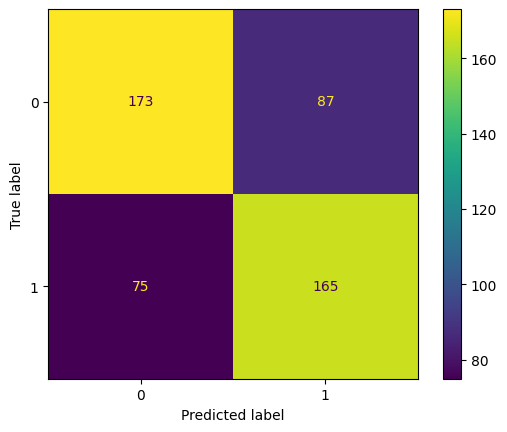

In [3]:
# 2. 어떤 사람이 한국인인가에 대한 Binary Classification(이진 분류) 상황이라고 가정합니다.
# 1은 참(즉, 한국인이다), 0은 거짓(즉, 한국인이 아니다)입니다.
# y_truth는 실제 정보(정답)이고, y_pred는 어느 Classification 모델이 뱉은 답이라고 칩니다.
# 우선, Confusion Matrix를 이용해 얼마나 잘 맞추었는지 확인해봅니다.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_truth = np.random.choice([0, 1], 500)
y_pred  = np.concatenate((y_truth[:200], np.random.uniform(0, 1, 300)))

confusion_mat = confusion_matrix(y_truth, np.round(y_pred))
confusion_mat_disp = ConfusionMatrixDisplay(confusion_mat)
confusion_mat_disp.plot()

plt.show()

# 그려진 Confusion Matrix 기준으로, y축은 실제 참/거짓 여부, x축은 예측된 참/거짓 여부로,
# 좌측 상단은 TN(실제 거짓, 예측 거짓), 좌측 하단은 FN(실제 참, 예측 거짓),
# 우측 상단은 FP(실제 거짓, 예측 참), 우측 하단은 TP(실제 참, 예측 참)을 나타냅니다.
# 분류 모델의 성능은 TPR(실제로 참인 것 중 올바르게 참으로 예측한 것의 비율)이 높고,
# FPR(실제로 거짓인 것 중 참이라고 잘못 예측한 것의 비율)이 낮을수록 성능이 좋습니다.

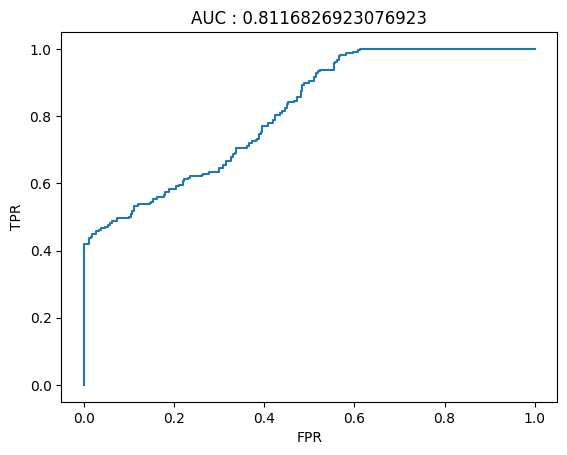

In [4]:
# ROC Curve를 간단하게 계산할 때에는 sklearn.metrics.roc_curve를 이용합니다.
# roc_curve()는 fpr, tpr, threshholds를 반환합니다. threshholds는 3.에서 설명할 classification 마지막 부분의 "기준"이 됩니다.
# ROC Curve는 이 threshholds를 바꾸어가면서 각 threshholds에서의 FPR과 TPR를 기록합니다.
# 즉, "특정 하나의 범주에 속할 확률"을 반환하는 모델에 대해서만 ROC Curve를 그릴 수 있습니다.
# AUC는 ROC Curve 밑의 면적을 말하며, 이게 클수록 성능이 좋습니다.
# AUC를 간단하게 계산할 때에는 sklearn.metrics.roc_auc_score를 이용합니다.

# 실제로 그래프를 그릴 때에는 FPR, TPR만을 필요로 합니다.
# roc_curve() 함수를 이용해 FPR, TPR를 구해 fpr, tpr 변수에 각각 할당하세요.
# 또한, roc_auc_score() 함수를 이용해 AUC를 구해 auc 변수에 할당하세요.

from sklearn.metrics import roc_curve, roc_auc_score

######>
fpr,tpr,threshholds = roc_curve(y_truth,y_pred)
auc = roc_auc_score(y_truth,y_pred)
######<

plt.plot(fpr, tpr)
plt.title(f"AUC : {auc}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [7]:
# Accuracy는 전체 예측 대상 중 올바르게 맞춘(즉, 참을 참이라고 예측, 거짓을 거짓이라고 예측)한 비율입니다. 잘 사용하지 않습니다.
# Precision은 참이라고 예측한 대상 중 올바르게 맞춘(즉, 실제로도 참인) 비율입니다.
# Recall은 실제로 참인 대상 중 참이라고 올바르게 맞춘 비율입니다.
# F1-Score는 Precision과 Recall의 조화평균으로,
# 두 평가지표를 단독으로 사용하였을 때 발생하는 문제를(데이터의 참/거짓 비율에 영향을 받는 등) 해결하기 위해 사용합니다.

# 위에서 구한 confusion_mat을 이용하거나, sklearn.metrics에서 적합한 메서드를 찾아 각 metric을 계산하세요.
# 위에 주어진 y_pred는 1/0가 아닌, 1일 확률이기 때문에, y_pred.round()로 1/0로 만들어 사용하세요.

######>
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_truth,y_pred.round())
precision = precision_score(y_truth, y_pred.round())
recall = recall_score(y_truth, y_pred.round())
f1 = f1_score(y_truth, y_pred.round())
######<

print(accuracy, precision, recall, f1)

0.676 0.6547619047619048 0.6875 0.6707317073170732


## **3. Logistic Regression**

지난 시간에 Linear Regression을 배웠습니다. Linear Regression은 1개 이상의 독립변수 x를 가지고, 연속형 변수인 y의 값이 몇일지를 예측하는 데에 사용하였습니다. <br><br>

Classification은 연속형 변수를 다루지 않고, 어느 범주에 속하는지, 그렇지 않은지 참/거짓으로만 구분해야하는 작업입니다. 참을 1, 거짓을 0으로 둔 하나의 연속형 변수로 본다고 하더라도, Linear Regression은 값이 1 혹은 0으로 나올 것이라는 보장도 없으며, 완전히 범위를 벗어나 100, -500과 같은 엉뚱한 값을 낼수도 있어 이를 그대로 이용하는 것은 적합하지 않습니다. <br><br>

Linear Regression을 Classification에 이용하기 위해 확장한 것이 Logistic Regression입니다. **1.**에서 확인해본 로지스틱 함수를 Linear Regression의 결과값에 적용해, 이 로지스틱 함수의 결과값을 "어떠한 범주에 속할 확률"으로 사용합니다. 최종적으로, 이 Logistic Regression의 결과에 **2.**에서 잠깐 확인한 threshholds, 즉 "확률이 p 이상이면 참, 아니면 거짓으로 정하겠다" 라는 기준을 적용해 참/거짓으로 결정하면 Classifier가 됩니다.

0.8111888111888111 0.76 0.7169811320754716 0.7378640776699028


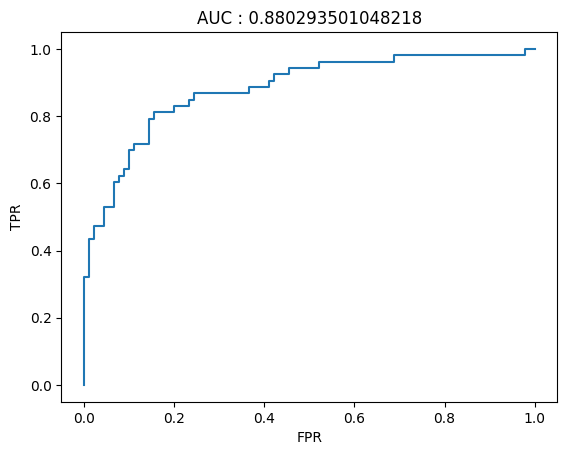

In [ ]:
# 3-a. 타이타닉 데이터에 Logistic Regression을 활용해봅니다.
# 종속변수는 'Survived'로, 생존하였다면 1, 죽었다면 0으로 합니다.
# 독립변수로는 Pclass, Sex, Age, SibSp, Parch, Fare, Embarked를 이용합니다.
# 전처리는 거의 생략합니다. 결측값이 있는 레코드는 제거하고,
# naive하게 문자열로 된 독립변수는 범주형 변수로 취급하여 get_dummies()를 이용해 one-hot encoding 합니다.

df_titanic = df_titan_org.copy(deep = True)

# 사용할 column 외에는 모두 drop합니다.
df_titanic = df_titanic.drop(df_titanic.columns.difference(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']), axis = 1)

# 결측값이 있는 레코드를 제거합니다.
df_titanic = df_titanic.dropna()

# 범주형 변수를 원-핫 인코딩 합니다.
df_titanic = pd.get_dummies(df_titanic)

# 독립변수와 종속변수를 지정합니다.
X = df_titanic.iloc[:, 1:]
y = df_titanic.iloc[:, 0]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 346)

# Logistic Regression에는 sklearn.linear_model.LogisticRegression 클래스를 이용합니다.
model = LogisticRegression(max_iter = 1000)

# 모델 학습 방법은 LinearRegression과 동일합니다.
model.fit(X_train, y_train)

# 예측 방법 또한 LinearRegression과 동일하나,
# LogisticRegression은 참/거짓을 1/0으로 예측한 값을 반환하는 메서드와 참일 확률을 [0, 1] 사이의 실수로 반환하는 메서드를 따로 가집니다.
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 성능을 평가하기 위해, ROC Curve 그래프를 그리고, AUC를 계산합니다.
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# 성능을 평가하기 위해, Accuracy, Precision, Recall, F1 Score를 계산합니다.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, precision, recall, f1)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'AUC : {auc}')

plt.show()

precision: 0.5618672665916761 recall: 0.24987493746873438, F1: 0.3459141274238227


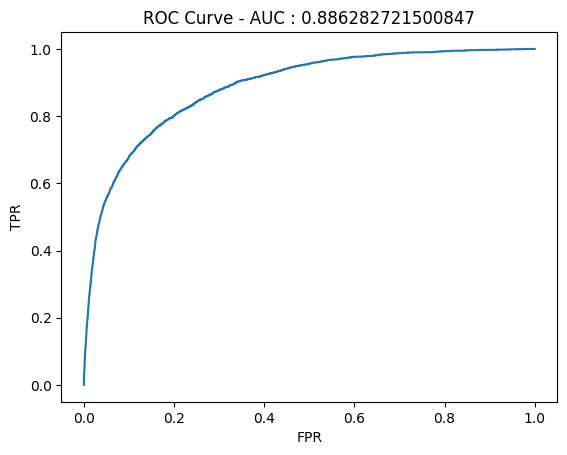

In [ ]:
# 3. 심장병 여부 예측에 Logistic Regression을 이용해보겠습니다.
# 'HadHeartAttack'을 종속변수로 하여, 전처리 및 모델 파라미터 설정을 자유롭게 하여 분류 성능을 ROC Curve, AUC, Precision, Recall, F1 Score로 나타내세요.
# 'HadHeartAttack'의 'Yes'는 1로, 'No'는 0으로 replace하세요.
# test_size는 0.3으로, random_state는 42로 설정하세요.

df_heart = df_heart_org.copy(deep = True)

######>
df_heart = df_heart.replace({"HadHeartAttack": "Yes"}, 1)
df_heart = df_heart.replace({"HadHeartAttack": "No"}, 0)
df_heart = df_heart.dropna()
df_heart = pd.get_dummies(df_heart)
X = df_heart[df_heart.columns.difference(["HadHeartAttack"])].select_dtypes(np.number)
y = df_heart["HadHeartAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'precision: {precision} recall: {recall}, F1: {f1}')

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC Curve - AUC : {auc}')

plt.show()
######<

## **4. Decision Tree**

Logistic Regression은 Linear Regression을 근간으로 하기 때문에, 일반화된 선형 모델이라고 합니다. Decision Tree는 Linear Regression과 완전히 다른 방식을 이용한 방식입니다. y_h = a1x1 + a2x2 + ... + b 식의 a1, a2, ..., b를 조절해가며 예측값 y_h과 실제값 y의 오차를 최소화하는 것을 목적으로 학습하는 Linear Regression과 달리, Decision Tree는 참/거짓으로 구분되는 질문을 계속하여 생성해 범주에 속하는 레코드들과 범주에 속하지 않는 레코드들을 분리해가며, 더 이상 나눌 수 없을 때 까지 이를 반복하고, 더 이상 나눌 수 없는 레코드들이 섞은 수준(impurity)를 줄이는 것을 목적으로 학습합니다. Decision Tree는 참(1)/거짓(0)이 확실하고, 구분이 되지 않는 경우에는 참과 거짓 중 어느 곳에도 가중치를 주지 않고 "구분할수 없다"(0.5)로 예측하기 때문에, 확률을 계산하지 않습니다.

[0.  0.5 1. ]
0.7482517482517482 0.639344262295082 0.7358490566037735 0.6842105263157895


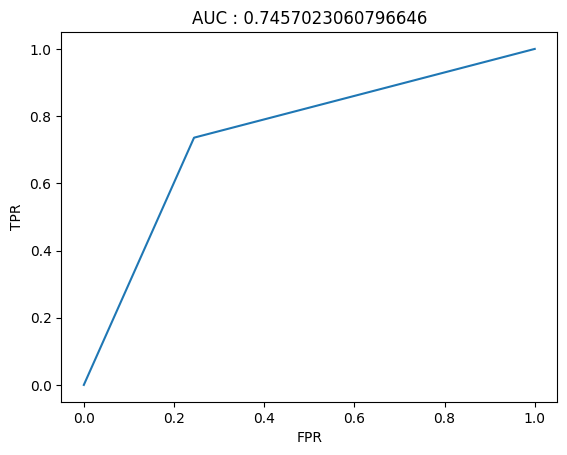

In [ ]:
# 4-a. 타이타닉 데이터에 Decision Tree를 활용해봅니다.
# 3-a.와 마찬가지로, 종속변수는 'Survived'로, 생존하였다면 1, 죽었다면 0으로 합니다.
# 독립변수로는 Pclass, Sex, Age, SibSp, Parch, Fare, Embarked를 이용합니다.
# 전처리는 거의 생략합니다. 결측값이 있는 레코드는 제거하고,
# naive하게 문자열로 된 독립변수는 범주형 변수로 취급하여 get_dummies()를 이용해 one-hot encoding 합니다.

df_titanic = df_titan_org.copy(deep = True)

# 사용할 column 외에는 모두 drop합니다.
df_titanic = df_titanic.drop(df_titanic.columns.difference(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']), axis = 1)

# 결측값이 있는 레코드를 제거합니다.
df_titanic = df_titanic.dropna()

# 범주형 변수를 원-핫 인코딩 합니다.
df_titanic = pd.get_dummies(df_titanic)

# 독립변수와 종속변수를 지정합니다.
X = df_titanic.iloc[:, 1:]
y = df_titanic.iloc[:, 0]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 346)

# Logistic Regression에는 sklearn.tree.DecisionTreeClassifier 클래스를 이용합니다.
model = DecisionTreeClassifier()

# 모델 학습 방법은 LogisticRegression과 동일합니다.
# fit은 Decision Tree 모델이 분류 작업에 이용한 질문들로 구성된 트리 구조를 반환합니다(트리 구조를 확인할게 아니라면 굳이 변수에 할당할 필요 없습니다.)
tr = model.fit(X_train, y_train)

# 예측 방법 또한 LogisticRegression과 동일하나,
# Decision Tree는 범주에 속할 확률을 구하는 것이 아니라, 확실하게 참/거짓으로 구분될 수 있는 질문의 연속으로 범주에 속한다, 속하지 않는다를 결정하기 때문에,
# 속한다(1), 속하지 않는다(0), 아무리 질문을 거쳐도 구분이 되지 않는다(0.5)의 세 가지 값만을 가지게 됩니다.
# 즉, 속할 확률을 구하지 않고 확실한 참/거짓을 출력하기 때문에, 유의미한 ROC Curve를 작성할 수 없습니다. (그냥 한 번 꺾이는 모양이 됩니다.)
# (threshold의 변화에 의한 참/거짓 판단 변화가 0.5인 경우 뿐이며, 이 또한 임의로 선택하는 것에 그치지 않습니다.)
y_pred = model.predict(X_test)
print(np.unique(model.predict_proba(X_test)))

# DecisionTree의 결과를 이용한 ROC Curve의 모양과 AUC를 한번 확인해봅니다.
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 성능을 평가하기 위해, Accuracy, Precision, Recall, F1 Score를 계산합니다.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, precision, recall, f1)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'AUC : {auc}')

plt.show()

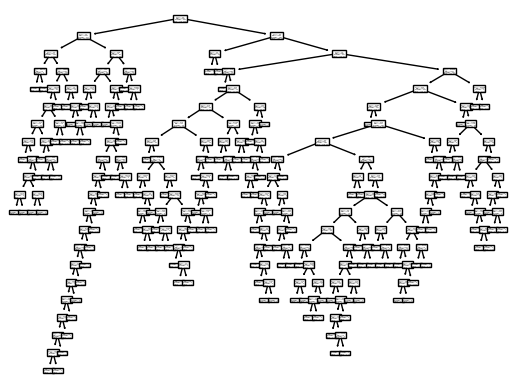

In [ ]:
# 4-a.에서 분류에 이용한 트리 구조를 확인해봅니다.
from sklearn import tree
tree.plot_tree(tr)
plt.show()

In [ ]:
# 4. 심장병 여부 예측에 Decision Tree를 이용해보겠습니다.
# 'HadHeartAttack'을 종속변수로 하여, 전처리 및 모델 파라미터 설정을 자유롭게 하여 분류 성능을 Precision, Recall, F1 Score로 나타내세요.
# 'HadHeartAttack'의 'Yes'는 1로, 'No'는 0으로 replace하세요.
# test_size는 0.3으로, random_state는 42로 설정하세요.

df_heart = df_heart_org.copy(deep = True)

######>
df_heart = df_heart.replace({"HadHeartAttack": "Yes"}, 1)
df_heart = df_heart.replace({"HadHeartAttack": "No"}, 0)
df_heart = df_heart.dropna()
df_heart = pd.get_dummies(df_heart)
X = df_heart[df_heart.columns.difference(["HadHeartAttack"])].select_dtypes(np.number)
y = df_heart["HadHeartAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'precision: {precision} recall: {recall}, F1: {f1}')
######<

precision: 0.27443168502460746 recall: 0.29289644822411204, F1: 0.2833635813672112
